In [108]:
import pandas as pd
import numpy as np
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 1. Simple/Polynomial Linear Regression
Run a simple linear regression using the Holdout method (train-test split) on salary data and plot the line plot of predicted vs the values from the test dataset.

In [2]:
os.chdir('/Users/patrickrs/Documents/GitLab/patrick-steiner/03-Machine-Learning')

In [3]:
sal = pd.read_csv('Salary_Data.csv')

In [4]:
# Test dataset is 10% of the total. Training is 90% of the total
# Use random_state for reproducibility
# X is an array with features (years of experience, in this case)
# y is a either categorical or continuous target variable (salary)

In [5]:
X = sal['YearsExperience']
y = sal['Salary']
X = X.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/3), random_state=42)
sc = StandardScaler()

In [6]:
# Define a scaler for data pre-processing, if needed
sc = StandardScaler()
# Define an instance of a particular model class
model = LinearRegression()

In [7]:
# Add both to a Pipeline. Use Pipeline as much as possible for maintainable code
pipeline = Pipeline([('data_scaling', sc), ('estimator', model)])

In [8]:
# Use the pipeline as a normal model to train
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('data_scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [9]:
# Use the pipeline as a normal model to:
# get all predictions
predictions = pipeline.predict(X_test)

In [10]:
# or get just the score
model_score = pipeline.score(X_test, y_test)

In [11]:
predictions

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

In [12]:
model_score

0.9553063138044949

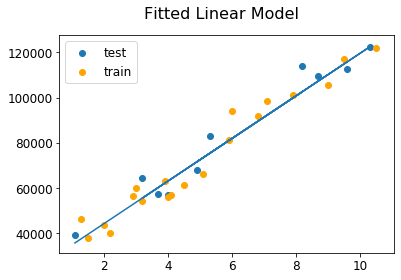

In [37]:

plt.scatter(X_test, y_test, label = 'test')
plt.scatter(X_train, y_train, label = 'train', color = 'orange')
plt.plot(X_test, predictions)
plt.suptitle('Fitted Linear Model', fontsize=16)
plt.legend()

In [20]:
# Trying higher polynomials
#model = LinearRegression(fit_intercept=False)

poly_order = range(1, 5)
model_scores = []

for order in poly_order:   
    polynomial_features= PolynomialFeatures(degree=order)   
    X_train_poly = polynomial_features.fit_transform(X_train)   
    X_test_poly = polynomial_features.transform(X_test)  
    pipeline.fit(X_train_poly,y_train)  
    model_score = pipeline.score(X_test_poly, y_test)
    print(model_score) 
    model_scores.append(model_score)

0.9553063138044949
0.9553101439570846
0.9616407830219948
0.9596552093642887


I Would choose the first. Both a visual inspection and a look at the R2 confirm the linearity.  

### 2. Multiple Linear Regression

### Part 1: Model Assessment
Run a multiple linear regression using the holdout method on the wine dataset with the goal to predict the alcohol level in wine. For this exercise hold 10% of the data as your test set.

In [235]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import random
import sklearn

In [164]:
wine =  pd.read_csv('winequality-white.csv', sep = ";")
hold = 0.1

In [230]:
X = wine.drop(['alcohol'], axis = 1)
y = wine['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = hold)
sc = StandardScaler()
model = LinearRegression()
pipeline = Pipeline([('data_scaling', sc), ('estimator', model)])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
model_score = pipeline.score(X_test, y_test)



In [231]:
model_score

0.9050904261932418

### Perform a k-Fold cross-validation on the whole dataset with k = 10. Repeat this procedure n times (e.g. 50 times).

In [191]:
k = 10
n = 100

In [254]:
sc = StandardScaler()
model = LinearRegression()
pipeline = Pipeline([('data_scaling', sc),
                     ('estimator', model)]
                   )

scores = np.empty(shape=0)
scores_avg = np.empty(shape=0)
# scores = []
for i in range(0, n):
    wine = wine.sample(frac = 1, 
                       random_state = i, 
                       axis = 'index'
                      )
    X = wine.drop(['alcohol'], 
                  axis = 1
                 )
    y = wine['alcohol']
    scores_temp = cross_val_score(pipeline, 
                                  X, 
                                  y, 
                                  cv = k
                                 )
    scores = np.append(scores, scores_temp)
    scores_avg = np.append(scores_avg, np.mean(scores_temp))

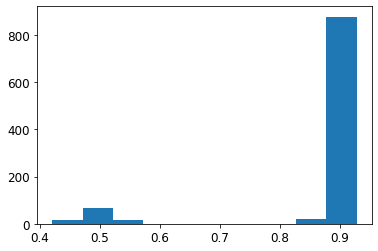

In [227]:
plt.hist(scores);

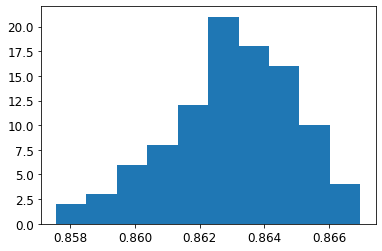

In [228]:
plt.hist(scores_avg);

### Repeat the above procedure with different scoring metrics for the linear regression, e.g. rmse.

Doing the same with max error. I'm keeping the same names as above for convenience. 
The only difference is in a particular line where I define "scoring = max_error"

In [237]:
sc = StandardScaler()
model = LinearRegression()
pipeline = Pipeline([('data_scaling', sc),
                     ('estimator', model)]
                   )

scores = np.empty(shape=0)
scores_avg = np.empty(shape=0)
# scores = []
for i in range(0, n):
    wine = wine.sample(frac = 1, 
                       random_state = i, 
                       axis = 'index'
                      )
    X = wine.drop(['alcohol'], 
                  axis = 1
                 )
    y = wine['alcohol']
    scores_temp = cross_val_score(pipeline, 
                                  X, 
                                  y, 
                                  cv = k,
                                  scoring='max_error',
                                 )
    scores = np.append(scores, scores_temp)
    scores_avg = np.append(scores_avg, np.mean(scores_temp))

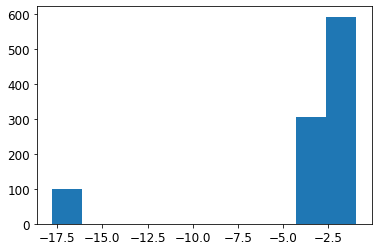

In [238]:
plt.hist(scores);

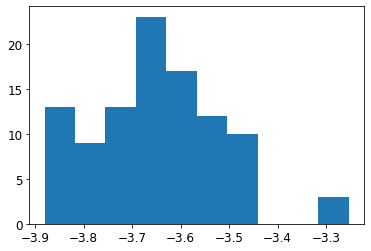

In [239]:
plt.hist(scores_avg);

In [236]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

### Part 2: Feature Transformation

Use a pair plot to visualize the variables.

Apply feature transformations and scaling:
    Linearizing: Investigate the pairplot and look for non-linear relationships between features that could be represented as         known mathematical functions, for example $1/x$ or $ln(x)$. Transform the features according to that function(s).

In [241]:
import seaborn as sns

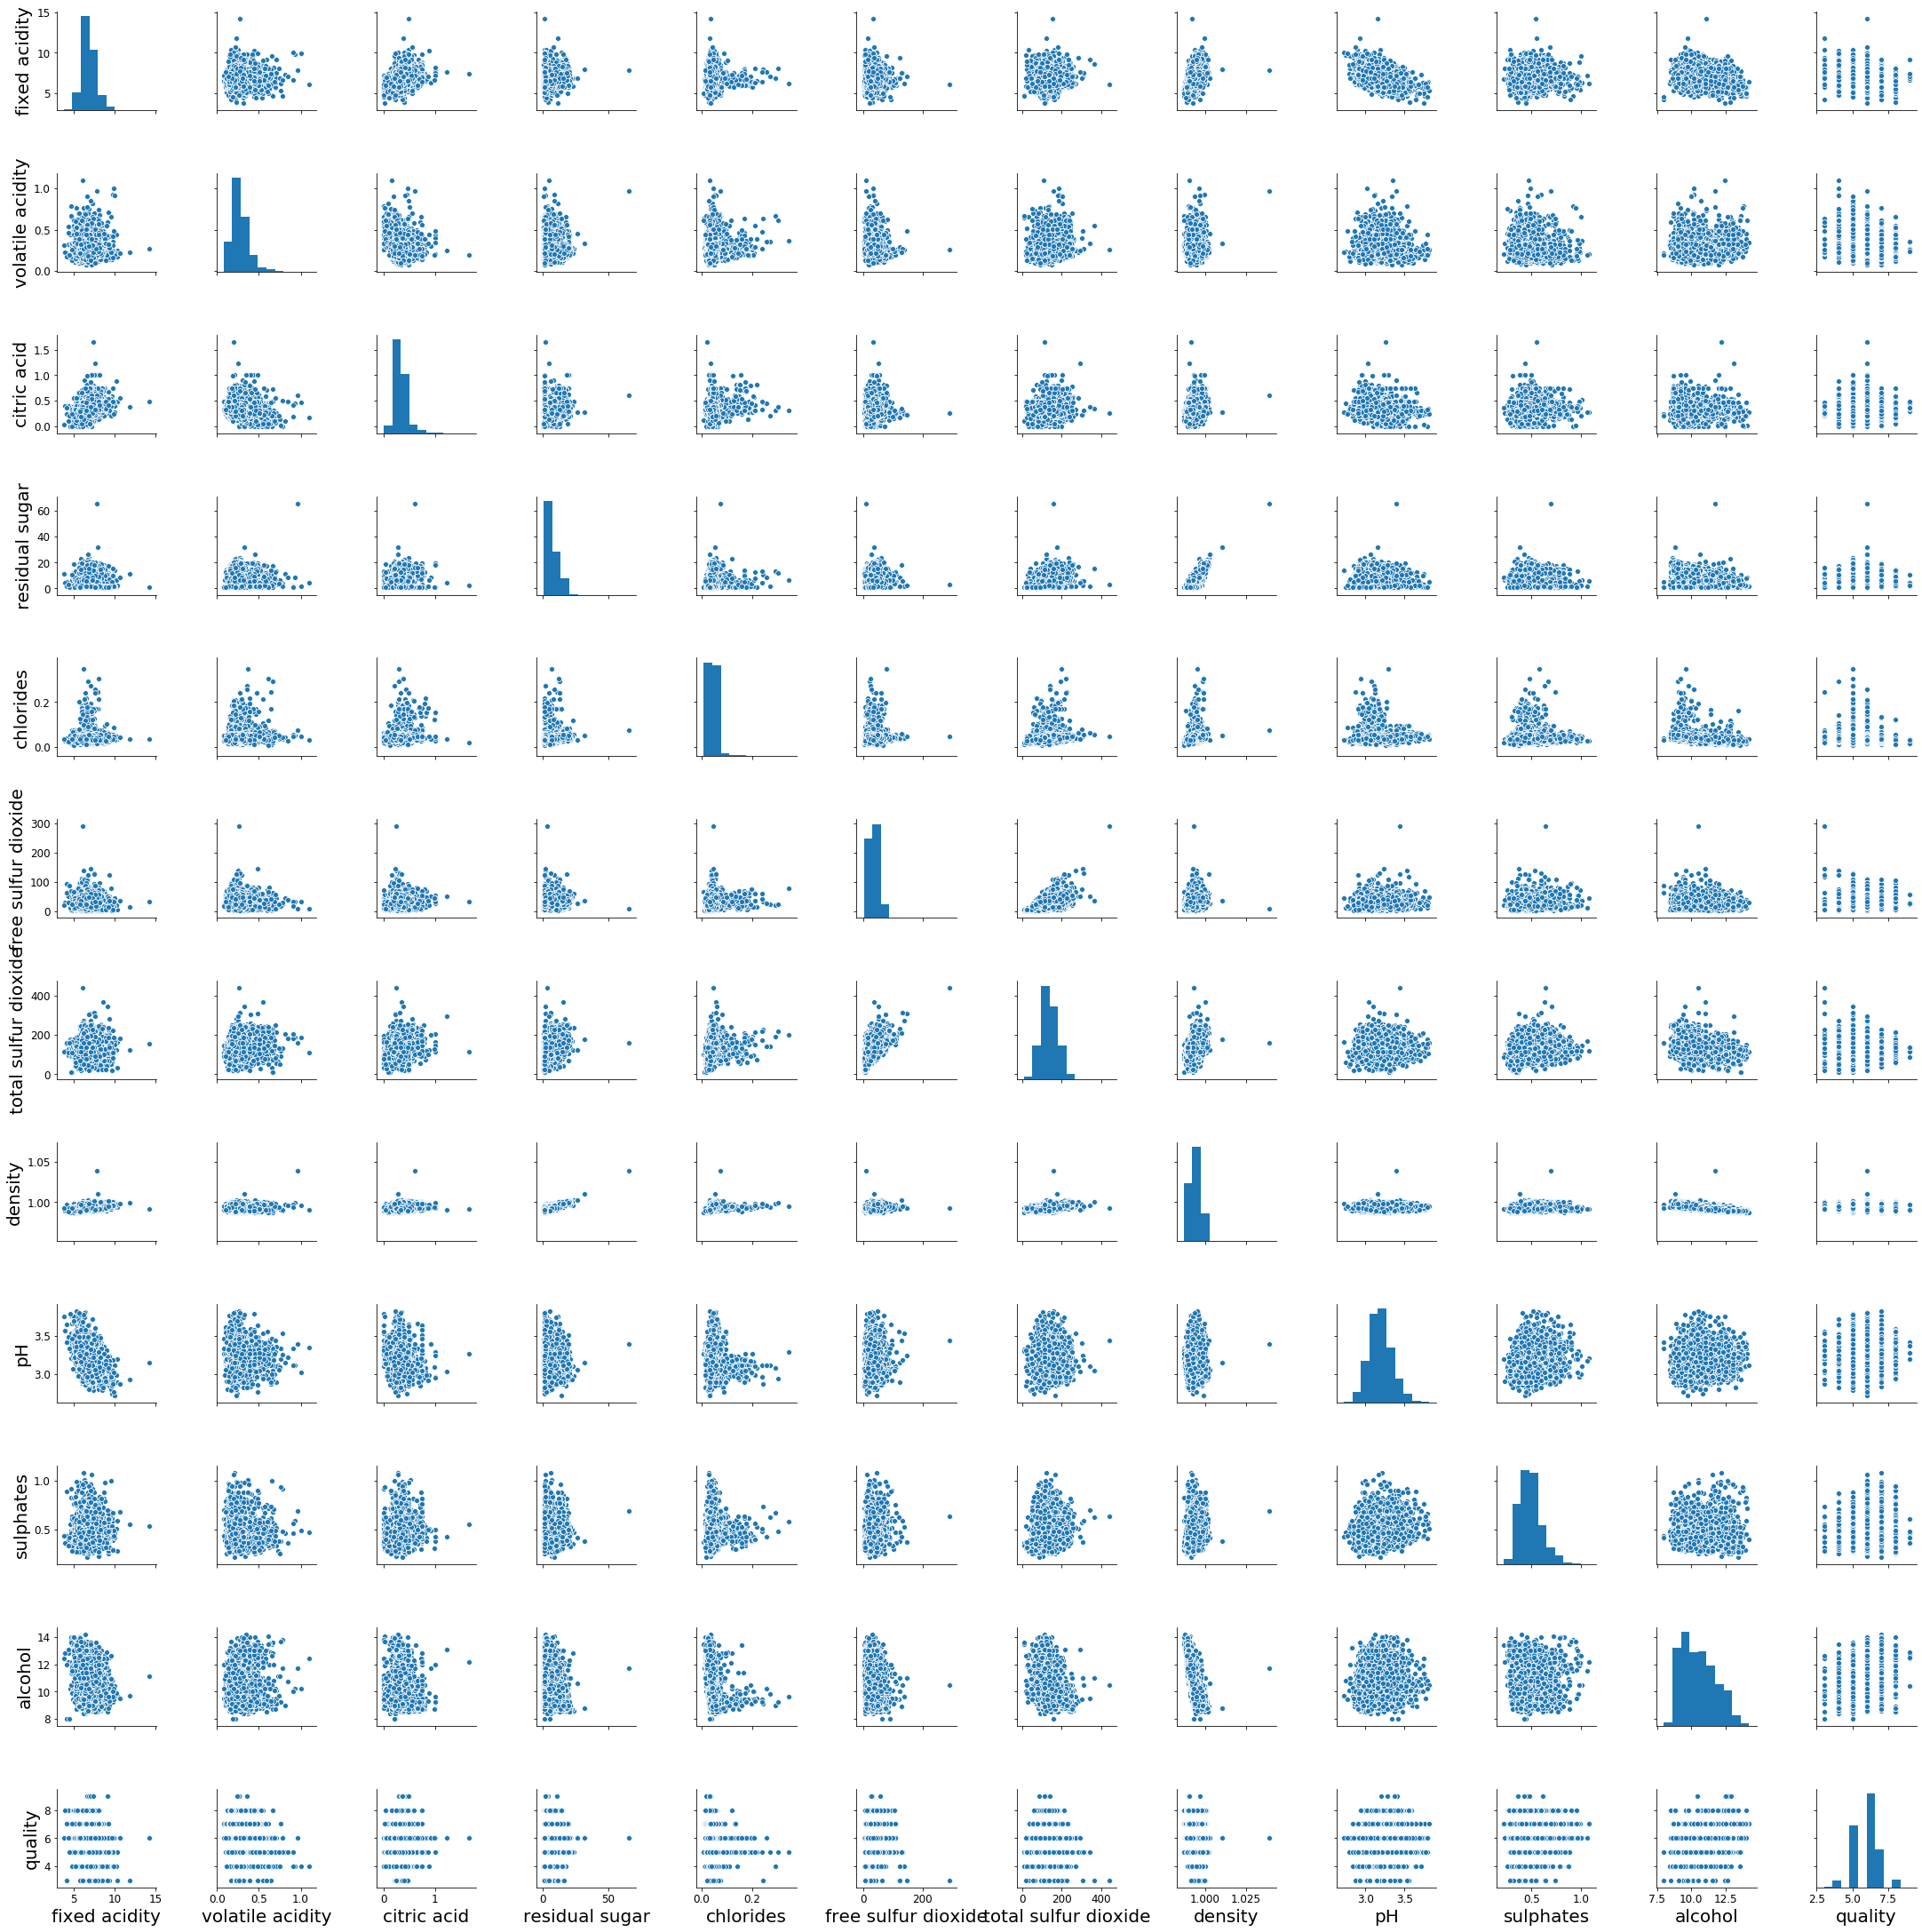

In [243]:
sns.pairplot(wine);

Residual sugar, alcohol, chlorides, and sulfur dioxide are right-skewed and could be logarithmized. 
Alcohol's relationship with fixed acidity, , volatile acidity, and free sulfur dioxide is also skewed. These can also be logarithmized. 

In [247]:
# Lets define the functions and regressors:
def func(x):
    return np.log(x)
def inverse_func(x):
    return np.exp(x)
rgs = ['residual sugar', 'alcohol', 'chlorides', 'total sulfur dioxide', 'free sulfur dioxide', 'fixed acidity',
      'volatile acidity']

In [249]:
from sklearn.compose import TransformedTargetRegressor

sc = StandardScaler()
model = LinearRegression()

regr = TransformedTargetRegressor(regressor = rgs,
                                  func = func,
                                  inverse_func = inverse_func)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = hold)
pipeline = Pipeline([('data_scaling', sc), ('estimator', model)])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
model_score = pipeline.score(X_test, y_test)

In [250]:
model_score

0.8890219901462184

In [255]:
np.mean(scores_avg)

0.8625835049037185

It is above the mean , so I guess it helps. A similar simulation as above could be conducted.

In [ ]:
k = 10 # number of splits
kf = KFold(n_splits = k)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]